<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Campo gravitacional en (0, 0, 0.2): -9.813646786905894 m/s²
El campo gravitacional coincide con el valor objetivo.


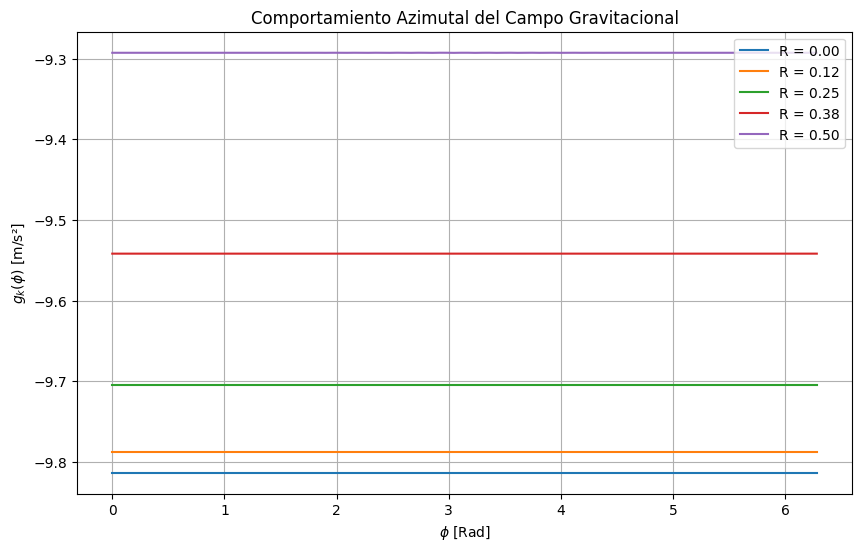

Campo gravitacional en el ecuador (R = 0.5): -9.292620391665517 m/s²
Campo gravitacional en el borde (R = 1): -4.6730471174430095 m/s²


In [2]:
#24
import numpy as np
import matplotlib.pyplot as plt

k = 1.9429303960
g_target = -9.813646

def gk_integrand(r, phi, x, y, z):
    denominador = x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi) + r**2
    denominador = np.maximum(denominador, 1e-10)
    return (z * r) / (denominador**(3/2))

def double_gauss_quad(f, a, b, c, d, N, x, y, z):
    roots, weights = np.polynomial.legendre.leggauss(N)
    r_vals = 0.5 * (b - a) * roots + 0.5 * (b + a)
    phi_vals = 0.5 * (d - c) * roots + 0.5 * (d + c)

    integral = 0
    for i in range(N):
        for j in range(N):
            integral += weights[i] * weights[j] * f(r_vals[i], phi_vals[j], x, y, z)
    integral *= 0.25 * (b - a) * (d - c)
    return integral

def calculate_gk(x, y, z, N=50):
    r_min, r_max = 0, 1
    phi_min, phi_max = 0, 2*np.pi

    integral_value = double_gauss_quad(gk_integrand, r_min, r_max, phi_min, phi_max, N, x, y, z)
    gk_value = -k * integral_value
    return gk_value

g_at_pole = calculate_gk(0, 0, 0.2)
print(f"Campo gravitacional en (0, 0, 0.2): {g_at_pole} m/s²")

if np.isclose(g_at_pole, g_target, atol=1e-6):
    print("El campo gravitacional coincide con el valor objetivo.")
else:
    print("El campo gravitacional no coincide con el valor objetivo.")

radii = [0, 0.125, 0.25, 0.38, 0.5]
phi_vals = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(10, 6))
for R in radii:
    g_values = []
    for phi in phi_vals:
        x = R * np.cos(phi)
        y = R * np.sin(phi)
        g = calculate_gk(x, y, 0.2)
        g_values.append(g)
    plt.plot(phi_vals, g_values, label=f'R = {R:.2f}')

plt.xlabel(r'$\phi$ [Rad]')
plt.ylabel(r'$g_k(\phi)$ [m/s²]')
plt.title('Comportamiento Azimutal del Campo Gravitacional')
plt.legend()
plt.grid()
plt.show()

# La gravedad no depende del ángulo sobre la tierra debido a que el planeta es un esféra, la distribución de masa
#es uniforme entonces el campo gravitacional siempre es el mismo sin importar el ángulo. También se debe a que la
# fuerza gravitacional es una fuerza central por lo que solo denpende de la distancia y no de la dirección angular.

# valores de la gravedad en R=0.5 y en el borde R=1
# Calcular el campo gravitacional en el ecuador (R = 0.5) y en el borde (R = 1)
g_ecuador = calculate_gk(0.5, 0, 0.2)
g_borde = calculate_gk(1, 0, 0.2)

print(f"Campo gravitacional en el ecuador (R = 0.5): {g_ecuador} m/s²")
print(f"Campo gravitacional en el borde (R = 1): {g_borde} m/s²")

#A un terraplanista se le puede argumentar que los cálculos muestran porque la tierra es una esféra.
# En caso de que la tierra fuera plana la gráfica sería distinta, es decir no constante
# pues la fuerza central de la gravedad no afectaría igual a cada parte de  la superficie de la tierra.

In [3]:
#25
#La solución está en las imágenes del respositorio


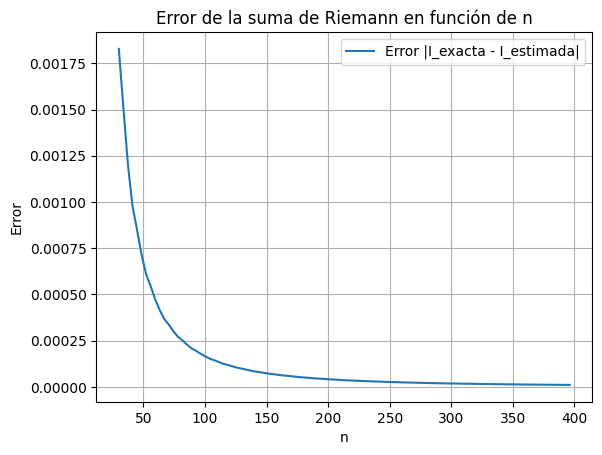

In [4]:
#26
#La parte teórica esta en las imágenes del repositorio

def f(x):
    return np.sin(x)


I_exacta = 2

def suma_riemann(f, a, b, n):
    x = np.linspace(a, b, n, endpoint=False)
    dx = (b - a) / n
    return np.sum(f(x)) * dx


a = 0
b = np.pi


n_values = np.linspace(30, 400, 100, endpoint=False)


errores = []


for n in n_values:
    I_estimada = suma_riemann(f, a, b, int(n))
    error = np.abs(I_exacta - I_estimada)
    errores.append(error)

plt.plot(n_values, errores, label='Error |I_exacta - I_estimada|')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error de la suma de Riemann en función de n')
plt.legend()
plt.grid(True)
plt.show()

#La suma de Riemann puede ser adecuada para aproximaciones simples,
#pero no es una estrategia eficiente en términos de precisión y número de puntos, especialmente cuando se compara con métodos como la cuadratura de Gauss.

In [5]:
#27
def equations(vars):
    x0, x1, x2, x3, w0, w1, w2, w3 = vars
    eqs = np.zeros(8)
    eqs[0] = w0 + w1 + w2 + w3 - 2
    eqs[1] = w0 * x0 + w1 * x1 + w2 * x2 + w3 * x3
    eqs[2] = w0 * x0**2 + w1 * x1**2 + w2 * x2**2 + w3 * x3**2 - 2/3
    eqs[3] = w0 * x0**3 + w1 * x1**3 + w2 * x2**3 + w3 * x3**3
    eqs[4] = w0 * x0**4 + w1 * x1**4 + w2 * x2**4 + w3 * x3**4 - 2/5
    eqs[5] = w0 * x0**5 + w1 * x1**5 + w2 * x2**5 + w3 * x3**5
    eqs[6] = w0 * x0**6 + w1 * x1**6 + w2 * x2**6 + w3 * x3**6 - 2/7
    eqs[7] = w0 * x0**7 + w1 * x1**7 + w2 * x2**7 + w3 * x3**7
    return eqs

def gradient_descent(equations, lr=0.01, tol=1e-6, max_iter=10000):
    resultado = np.random.uniform(-1, 1, size=8)

    for i in range(max_iter):
        eqs = equations(resultado)
        error = np.sum(eqs**2)

        if error < tol:
            print(f"Convergencia lograda en {i} iteraciones con error {error}")
            break

        grad = np.zeros_like(resultado)
        h = 1e-6

        for j in range(len(resultado)):
            vars_step = np.copy(resultado)
            vars_step[j] += h
            grad[j] = (np.sum(equations(vars_step)**2) - error) / h

        resultado -= lr * grad

        if i % 1000 == 0:
            print(f"Iteración {i}: Error = {error}")

    return resultado

solucion = gradient_descent(equations, lr=0.01, tol=0.0005)


x0, x1, x2, x3, w0, w1, w2, w3 = solucion

print("Puntos xi:", x0, x1, x2, x3)
print("Pesos wi:", w0, w1, w2, w3)


def f(x):
    return np.cos(x)


I_approx = w0 * f(x0) + w1 * f(x1) + w2 * f(x2) + w3 * f(x3)
I_real = 2 * np.sin(1)

print(f"Integral aproximada: {I_approx}")
print(f"Valor real de la integral: {I_real}")


precision = abs(I_approx - I_real)
print(f"Diferencia entre la integral aproximada y real: {precision}")


Iteración 0: Error = 1.2554438951914617
Iteración 1000: Error = 0.04696217837974427
Iteración 2000: Error = 0.009637224521721985
Iteración 3000: Error = 0.003756296990863392
Iteración 4000: Error = 0.0017690713383141793
Iteración 5000: Error = 0.001190452076838478
Iteración 6000: Error = 0.001033816094679832
Iteración 7000: Error = 0.0009887993227059456
Iteración 8000: Error = 0.0009716388539260223
Iteración 9000: Error = 0.0009612134150354843
Puntos xi: 0.7886861404555592 0.4207737061596536 -0.7941123671245676 0.04030158119556519
Pesos wi: 0.5602591337579879 -0.14710196697065442 0.5311502944391571 1.0558680800515268
Integral aproximada: 1.6878911807293895
Valor real de la integral: 1.682941969615793
Diferencia entre la integral aproximada y real: 0.0049492111135964745


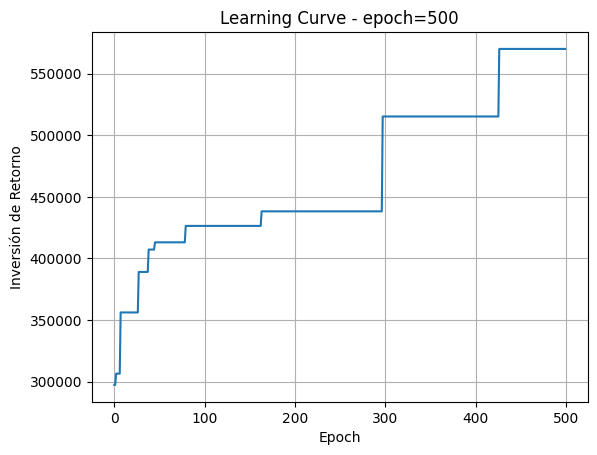

Mejor vector de ponderación w: [0.18815588 0.14700842 0.13969544 0.1212088  0.10430412 0.1190282
 0.08913812 0.09146102]
Inversiones en cada opción: [188155.87579196 147008.41863786 139695.44091925 121208.80336237
 104304.11726637 119028.2043009   89138.12225926  91461.01746203]
Retorno mínimo posible: 570049.9110523423
Retorno máximo posible: 1258172.5211374643


In [20]:
#Algebra lineal


C = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])

Ca = 1_000_000

def calcular_retorno(w, C, Ca):
    retorno = Ca * (w * C - 1)
    return np.min(retorno)


class AlgoritmoGeneticoInversion:
    def __init__(self, cuotas, Ca, N=500, epochs=500, tasa_mutacion=0.1):
        self.cuotas = cuotas
        self.Ca = Ca
        self.N = N
        self.epochs = epochs
        self.tasa_mutacion = tasa_mutacion
        self.pesos = np.random.uniform(0, 1, size=(N, len(cuotas)))
        self.pesos = self.pesos / self.pesos.sum(axis=1, keepdims=True)

    def fitness(self, w):
        return calcular_retorno(w, self.cuotas, self.Ca)

    def mutacion(self, w):
        w_mutado = w + np.random.normal(0, self.tasa_mutacion, size=w.shape)
        w_mutado = np.abs(w_mutado)
        w_mutado = w_mutado / w_mutado.sum()
        return w_mutado

    def evolucionar(self):
        mejores_fitness = []
        for epoch in range(self.epochs):
            fitness_vals = np.array([self.fitness(w) for w in self.pesos])
            indices_mejores = np.argsort(fitness_vals)[-self.N//2:]
            mejores_pesos = self.pesos[indices_mejores]
            nuevos_pesos = []
            for _ in range(self.N - len(mejores_pesos)):
                padre1, padre2 = mejores_pesos[np.random.randint(len(mejores_pesos), size=2)]
                hijo = (padre1 + padre2) / 2
                hijo = self.mutacion(hijo)
                nuevos_pesos.append(hijo)
            self.pesos = np.vstack((mejores_pesos, nuevos_pesos))
            mejores_fitness.append(np.max(fitness_vals))
        return mejores_fitness, self.pesos[np.argmax(fitness_vals)]

alg_genetico = AlgoritmoGeneticoInversion(C, Ca)
fitness_historial, mejor_w = alg_genetico.evolucionar()


plt.plot(fitness_historial)
plt.title("Learning Curve - epoch=500")
plt.xlabel("Epoch")
plt.ylabel("Inversión de Retorno")
plt.grid(True)
plt.show()


print("Mejor vector de ponderación w:", mejor_w)

inversiones = mejor_w * Ca
print("Inversiones en cada opción:", inversiones)

retorno_min = calcular_retorno(mejor_w, C, Ca)
retorno_max = Ca * (np.max(mejor_w * C) - 1)
print("Retorno mínimo posible:", retorno_min)
print("Retorno máximo posible:", retorno_max)

#En conclusion si se gana dinero.